In [1]:
import silq
silq.initialize("EWJN")

qc.show_subprocess_widget()
%matplotlib nbagg

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing instruments
Initializing parameters
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Communicating with instruments

In [ ]:
PulseBlaster.stop()

In [2]:
TGAC()

1.842

In [3]:
DF_DS()

2.57

In [ ]:
DF_DS(2.56)

# DC sweep

### TGAC vs DF_DS

In [35]:
TGAC_vals = list(np.linspace(1.65,1.95, 20))
DF_DS_vals = list(np.linspace(2.54,2.61,20))

In [36]:
DC_parameter.setup()
data = qc.Loop(TGAC[TGAC_vals]
              ).loop(DF_DS[DF_DS_vals]
                    ).each(DC_parameter
                          ).run(name='DC_sweep',
                                progress_interval=True)

DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-21/#004_DC_sweep_09-19-57'
   <Type>   | <array_id>      | <array.name> | <array.shape>
   Setpoint | SIM900_TGAC_set | TGAC         | (25,)
   Setpoint | DF_DS_set       | DF_DS        | (25, 25)
   Measured | DC_voltage      | DC_voltage   | (25, 25)
started at 2016-09-21 09:19:59


<IPython.core.display.Javascript object>


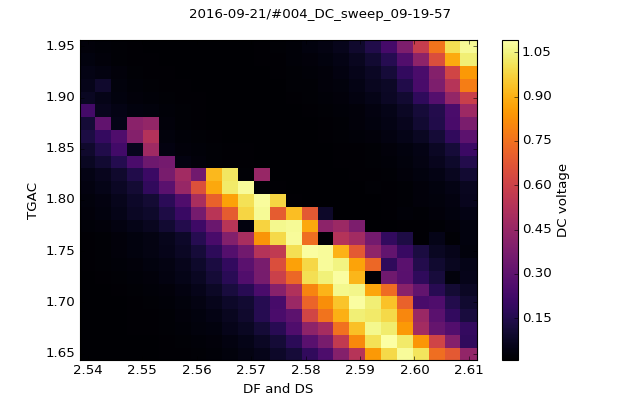

In [37]:
plot = qc.MatPlot(data.DC_voltage)

# Tuning sequence

Pulse sequence consists of five successive stages

<IPython.core.display.Javascript object>


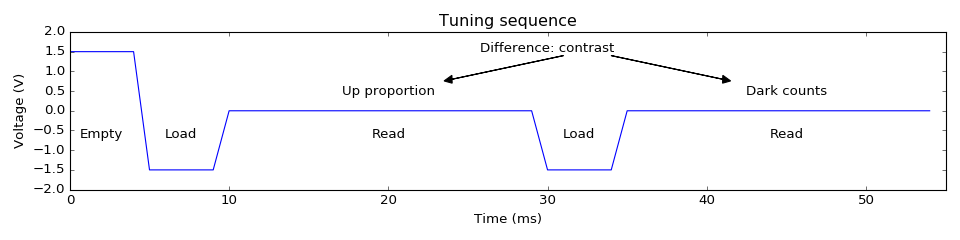

In [38]:
vals = [1.5]*5+[-1.5]*5+[0]*20+[-1.5]*5+[0]*20
fig = plt.figure(figsize=(12,3))
plt.plot(vals)
for x, text in [[2,'Empty'], [7, 'Load'], [20, 'Read'],[32, 'Load'], [45, 'Read']]:
    plt.text(x, -.7, text, horizontalalignment='center')
plt.text(20, .4, 'Up proportion', horizontalalignment='center')
plt.text(45, .4, 'Dark counts', horizontalalignment='center')
plt.text(30, 1.5, 'Difference: contrast', horizontalalignment='center')

plt.arrow(31, 1.4, -7, -0.6, head_width=.2, head_length=.5, fc='k', ec='k')
plt.arrow(34, 1.4, 7, -0.6, head_width=.2, head_length=.5, fc='k', ec='k')
plt.xlim(0,55)
plt.ylim(-2,2)
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title("Tuning sequence")
plt.tight_layout()

In [39]:
TGAC(1.842)
DF_DS(2.57)

In [40]:
ELRLR_parameter.setup(samples=200, print=True)
ELRLR_parameter();

fidelity_empty: 0.975
fidelity_load: 0.862
fidelity_read: 0.718
up_proportion: 0.483
dark_counts: 0.325
contrast: 0.158


# T1 measurement

In [43]:
# Calculate T1 durations (shuffled)
T1_wait_times = list(np.round(np.logspace(1,3,num=10,base=10)))
print('T1 wait times: {}'.format(T1_wait_times))

T1 wait times: [10.0, 17.0, 28.0, 46.0, 77.0, 129.0, 215.0, 359.0, 599.0, 1000.0]


DataSet:
   mode     = DataMode.PULL_FROM_SERVER
   location = '2016-09-21/#005_T1_single_sweep_09-23-10'
   <Type>   | <array_id>        | <array.name>      | <array.shape>
   Setpoint | T1_wait_time_set  | T1_wait_time      | (10,)
   Measured | up_proportion     | up_proportion     | (10,)
   Measured | num_traces_loaded | num_traces_loaded | (10,)
started at 2016-09-21 09:23:11


<IPython.core.display.Javascript object>


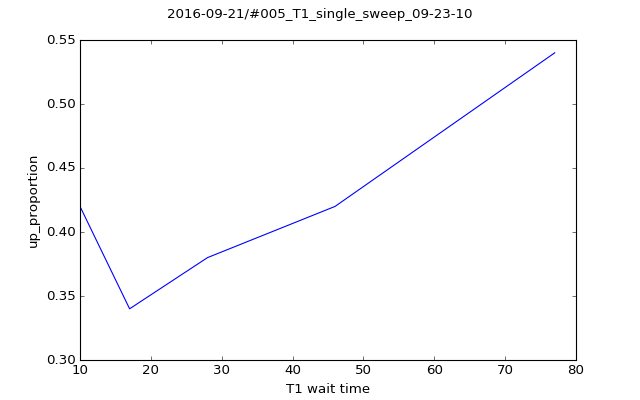

In [44]:
# Single T1 sweep
T1_parameter.setup(samples=50)

data = qc.Loop(T1_parameter[T1_wait_times]
                     ).each(T1_parameter
                           ).run(name='T1_single_sweep')

plotQ = qc.MatPlot(data.up_proportion)